# Проектная работа 3 Курс 2021/2022

# Идентификация фунции фитнеса методами машинного обучения

# Этап 0 | Постановка задачи | Ожидаемый результат

Цель проекта: Восстановление функции фитнеса, с помощью различных методов машинного обучения

План работы:
- Теоретический модуль
   1. Для начала стоит изучить доступную литературу по данному предмету (список находится в конце Этапа 0)
   2. Изучить базовые возможности и синтаксис языка программирования Python
   3. Создание и исследование математической модели
   4. Ознакомление с возможностями Jupiter Notebook
- Практический модуль
   1. Создание обучающей выборки
   2. Обучение классификаторов
   3. Проверка качества классификатора
   4. Дополнительная проверка качества классификатора
   5. Правка багов и аномалий (тестирование и исправление ошибок)
   6. Написание финального отчета по окончаю проекта

Краткое изложение всей теоретической базы (*За более подробными данными в список литературы*)

Функция фитнеса - это функция биологической приспособленности
- Благодаря выявлению функции фитнеса есть возможность найти оптимальное решение
- Следовательно найти оптимальную стратегию поведения

Фитнес всегда определятеся по разному, но по всем (**моим**) наблюдениям это какая-то функция, которая зависит от различных параметров. Эти параметры (*Макропараметры*) в данной проектной работе представляют из себя описание окружающей среды, количество хищников, естественную смертность и тд. (*Более подробно в Этапе 1)

> Читатель: Почему объектом изучения является Зоопланктон?

> Breketov: Ну потому что это хорошо изученные организмы, + они перемещаются по всеми известной синусоиде (**Ни в коем случае не путать с косинусоидой о которой как оказалось никто не знает**)

> Breketov: Кстати говоря их перемещения носят отдельной научное название - суточные вертикальные миграции (СВМ) или на english (DVM - Diel vertical migration)

> Breketov: Ну а еще если переводить это в математику, то окажется, что выходит довольно простая система, с большим количесвом эмпирических данных

> Читатель: Я понял, можешь больше не продолжать, душнила.

> Высший разум: Рыбка плавать вверх и вниз и вкусно получать (Это шутка)

Ну и после небольших бед с б**кой^ можно поговорить об обучающей выборке:
- Выборка - конечный отбор чего-то с известной принадлежностью к одному из двух множеств
- И в работе необходимо будет создать обучающую выборку, в которой представлены признаки и принадлежность к определенному классу

В проектной работе в качестве стратегий будут две синусоиды (**НЕ КОСИНУСОИДЫ**), где одна относится к молодым особям, ну то есть к джунам, а другая к взрослым, ну или к сеньорам. Ну и касаемо ранжирования стоит сказать что в данном случае у нас будут сравниваться i-ый элемент с со всеми j-ими.

В проекте мы реализуем 2 главных метода классификации:
- Метод опорных векторов или на english мове (SVM)
- Фишеровский дискриминант или на мове (LDA)

Ну и в итоге планируется получить как можно более точные и правдоподобные результаты (*по крайней мере чтобы не оказалось так, что хищники увеличили популяцию зооплантончика нашего ненаглядного*)

Чорт, чуть не забыл про литературу нашу любимую:

- [*Exploring Evolutionary Fitness in Biological Systems Using Machine Learning Methods*](https://www.mdpi.com/1099-4300/23/1/35/htm)
- [*Лекции от Вышки по МО*](https://github.com/esokolov/ml-course-hse)
- [*Почему только 2, а потому что все легко гуглится мы же в 21 веке живем чувак) Это кстати тоже ссылка можешь перейти*](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

# Этап 1 | Обучающая выборка | Ранжирование

## 1. Построение обучающей выборки (Теория)

По реальным наблюдениям мы имее следующие коэффициенты для каждого поколения:

                                                Для молодых особей:
$
\alpha_J = 0.0016,
\beta_J = 0.0000007,
\gamma_J = 0.00008,
\delta_J = 0.000016
$

                                                Для взрослых особей:
$
\alpha_A = 0.006,
\beta_A = 0.000000075,
\gamma_A = 0.004,
\delta_A = 0.00006
$

Пусть имеют место параметризации функций окружающей среды:

- $E(x)$ - пространственное распределение пищи по вертикальной координате $x$

- $S(x)$ - пространственное распределение хищников по вертикальной координате $x$

- $S(t)$ - активность хищников

- $G(x)$ - совокупность дополнительных факторов окружающей среды, типо перепадов температур, радиция и тд.

И нам известны параметры $D$ - максимальная глубина и $D_0$ - оптимальная глубина. А так же $\sigma_1 = 1$, $\sigma_2 = 1$
$$
\begin{cases}
    E = \sigma_1 (x + D)\\
    S_x = \sigma_2 (x + D)
\end{cases}
-D < x < 0
$$
$$
\begin{cases}
    G = (x + D_0)^2\\
    S_{\tau} = cos(2\pi\tau) + 1
\end{cases}
0 < \tau < 1
$$
Возьмем в качестве $v_i$ стратегии две стадии жизнии зоопланктона: молодых и взрослых особей
$$
x_{J} = A_{J} + B_{J}cos(2\pi\tau)\ \ \ \ \ \ x_{A} = A_{A} + B_{A}cos(2\pi\tau)
$$

Где мы должны взять ограничения для параметров A и B такие что: $ -D < A < 0$, $|B| < min(A + D, -A)$

Ключевыми макропараметрами являются:

$ M_1 $ и $ М_5 $ - количество потребляемой пищи в сутки

$ M_2 $ и $ М_6 $ - суточная смертность от хищников

$ M_3 $ и $ М_7 $ - метаболическая стоимость вертикальной миграции

$ M_4 $ и $ М_8 $ - смертность зоопланктона от неблагоприятных условий среды

                Для молодых особей:
$$
M_1(v_i) = \int_0^1 E(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_2(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_3(v_i) = -\int_0^1 (x'_{Ji}(\tau))^2d\tau\ \ \ \ \ \ M_4(v_i) = -\int_0^1 G(x_{Ji}(\tau))d\tau
$$
                Для взрослых особей:
$$
M_5(v_i) = \int_0^1 E(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_6(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_7(v_i) = -\int_0^1 (x'_{Ai}(\tau))^2d\tau\ \ \ \ \ \ M_8(v_i) = -\int_0^1 G(x_{Ai}(\tau))d\tau
$$

Известная функция фитнеса: $ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

С коэффициентами:

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $ - воспроизводство 

$ s = \gamma_{A}M_6 $ - уровень смертности молодых особей

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $ - созревание молодых особей

$ q = \gamma_{J}M_2 $ - уровень смертности взрослых особей

Теперь с полностью подготовленной математической частью мы создаем с помощью рандомной генерации в заданных диапазонах параметры $A$ и $B$ для каждой стадии, количество генерируемых стратегий выберем небольшим, чтобы не сильно нагружать оборудование. Далее мы в интегралы всех макропараметров подставляем известные значения и вычисляем их после чего имеем более простую формулу нахождения этих макропараметров:

$M_1 = \sigma_1(A_J + D)$

$M_2 = -\sigma_2(A_J+ D + B_J/2)$

$M_3 = -2(\pi B_J)^2$

$M_4 = -((A_J + D_0)^2 + B_J^2/2)$

$M_5 = \sigma_1(A_A + D)$

$M_6 = -\sigma_2(A_A + D + B_A/2)$

$M_7 = -2(\pi B_A)^2$

$M_8 = -((A_A + D_0)^2 + B_A^2/2)$

На следующем шаге мы считаем параметры $s,p,q,r$ и соответственно найти значения функции фитнеса $J$ и стоит добавить, что если подкоренное выражение окажется равным нулю, то мы заменим значение фитнеса не комплексным числом, а нулем. Далее мы считаем пары стратегий с известными значениями фитнеса для каждой стратегии и если $M_i(\upsilon) - M_j(\omega) < 0 $, то мы идентифицируем эту точку в класс $-1$, иначе мы определим ее в класс $1$. После у нас будет готова обучающая выборка для классификаторов и уже разделив ее на тестовую и обучающую мы сможем обучить наши классификаторы. На выходе они нам дадут 44 числа, которые являются коэффициентами при макропараметрах в неизвесной функции фитнеса:

$F = \sum_{i=1}^8 \lambda_i M_i + \sum_{i=1}^8 \sum_{j=1}^8 \lambda_{ij} M_i M_j$, где  $\lambda_{ij} =  \lambda_{ji}$

Концом данного этапа станет подсчет точности классификатора по с помощью стандартного подхода и логарифмической потери, а также создание двумерных и трехмерных графиков с разделяющими гиперплоскостями полученными с помощью классификаторов SMV и LDA.

## 2. Реализация

### 2.1 Исходные данные

In [188]:
# Обозначим эмпирические данные молодых и взрослых особей
# И затащим их в один массив
# lam = [alpha_j, gamma_j, betta_j, delta_j, alpha_a, gamma_a, betta_a, delta_a]
lam_M = [0.0016, 0.00008, 0.0000007, 0.000016, 0.006, 0.004, 0.000000075, 0.00006]
lam_M2, lam_MM = [], []
for i in range(0, 8):
    for j in range(0, 8):
        if i == j:
            lam_M2.append(lam_M[i]*lam_M[j])
        else:
            lam_MM.append(lam_M[i]*lam_M[j])
lam = lam_M + lam_M2 + lam_MM

# Сформируем вектор дополнительных данных 
sigma1, sigma2, D, D0 = 1, 1, 120, 70

# Количество генерируемых стратегий
Nmax = 20

### 2.2 Генерации стратегий

In [189]:
# # Старая версия генерации
# import random as rn
# import pandas as pd
# # Генерация параметров для стратегий
# # Запись параметров в data_strat
# def strategy(Nmax):
#     def rand_strat():
#         A, B = [], []
#         for i in range(0, Nmax):
#             a = rn.uniform(-D, 0)
#             b = rn.uniform(0, min(-a, a + D))
#             A.append(a)
#             B.append(b)
#             A.append(a)
#             B.append(-b)
#         return A, B
# 
#     A, B = rand_strat()
#     data_strat1 = {'Aj': A, 'Bj': B}
#     data1 = pd.DataFrame(data = data_strat1)
#     A, B = rand_strat()
#     data_strat2 = {'Aa': A, 'Ba': B}
#     data2 = pd.DataFrame(data = data_strat2)
#     data = pd.concat([data1, data2], axis=1)
#     data.to_csv("data_strat.csv", index=False)
#     return data
# data_strat = strategy(Nmax)
# data_strat

In [190]:
# Генерация с перемешиванием
import random as rn
import pandas as pd
# Генерация параметров для стратегий
# Запись параметров в data_strat
def strategy(Nmax):
    def rand_strat_A():
        A = []
        for i in range(0, Nmax):
            a = rn.randint(-D*100, 0)
            A.append(a)
        rn.shuffle(A)
        return A
    def rand_strat_B(a):
        A, B = [], []
        for i in range(0, Nmax):
            x = min(-a[i], a[i] + D*100)
            b = rn.randint(-x, x)
            A.append(a[i]/100)
            B.append(b/100)
            A.append(a[i]/100)
            B.append(-b/100)
        return A, B

    a = rand_strat_A()
    A, B = rand_strat_B(a)
    data_strat1 = {'Aj': A, 'Bj': B}
    data1 = pd.DataFrame(data = data_strat1)
    a = rand_strat_A()
    A, B = rand_strat_B(a)
    data_strat2 = {'Aa': A, 'Ba': B}
    data2 = pd.DataFrame(data = data_strat2)
    data = pd.concat([data1, data2], axis=1)
    data.to_csv("data_strat.csv", index=False)
    return data
    
data_strat = strategy(Nmax)
data_strat

,Aj,Bj,Aa,Ba
0,-7.12,-1.47,-84.32,20.63
1,-7.12,1.47,-84.32,-20.63
2,-87.49,-20.49,-36.83,31.27
3,-87.49,20.49,-36.83,-31.27
4,-50.96,-13.88,-87.46,-2.72
5,-50.96,13.88,-87.46,2.72
6,-54.34,23.61,-26.09,17.55
7,-54.34,-23.61,-26.09,-17.55
8,-18.73,18.67,-50.36,-23.08
9,-18.73,-18.67,-50.36,23.08


In [191]:
# # Генерация с сочетаниями
# import random as rn
# import pandas as pd
# # Генерация параметров для стратегий
# # Запись параметров в data_strat
# def strategy(Nmax):
#     def rand_strat_A():
#         A = []
#         for i in range(0, Nmax):
#             a = rn.randint(-empi[2]*100, 0)
#             A.append(a)
#         rn.shuffle(A)
#         return A
#     def rand_strat_B(a):
#         A, B = [], []
#         for i in range(0, Nmax):
#             x = min(-a[i], a[i] + empi[2]*100)
#             b = rn.randint(-x, 0)
#             A.append(a[i]/100)
#             B.append(b/100)
#         return [A, B]
# 
#     a = rand_strat_A()
#     Juvenial = rand_strat_B(a)
#     #data_strat1 = {'Aj': A, 'Bj': B}
#     #data1 = pd.DataFrame(data = data_strat1)
# 
#     a = rand_strat_A()
#     Adult = rand_strat_B(a)
#     #data_strat2 = {'Aa': A, 'Ba': B}
#     #data2 = pd.DataFrame(data = data_strat2)
#     data_sum = []
#     for i in range(len(Juvenial[0])):
#         for j in range(len(Adult[0])):
#             data_sum.append({'Aj': Juvenial[0][i], 'Bj': Juvenial[1][i], 'Aa': Adult[0][j], 'Ba': Adult[1][j]})
#     data = pd.DataFrame(data = data_sum)
#     
#     data.to_csv("data_strat.csv", index=False)
#     return data
#     
# data_strat = strategy(Nmax)
# data_strat

### 2.3 Подсчет макропараметров и создание выборки

In [192]:
import pandas as pd
import numpy as np
from collections import defaultdict
# Подсчет макропараметров с обычными функциями окружающей среды
# Запись их в data_macro
def macroparams(data_strat):
   Aj = data_strat['Aj'].tolist()
   Bj = data_strat['Bj'].tolist()
   Aa = data_strat['Aa'].tolist()
   Ba = data_strat['Ba'].tolist()
   collect = defaultdict(list)
   collect_M = defaultdict(list)
   collect_MM = defaultdict(list)
   for i in range(0, len(data_strat)):
      collect['M1'].append(sigma1*(Aj[i] + D))
      collect['M2'].append(-sigma2*(Aj[i] + D + Bj[i]/2))
      collect['M3'].append(-2*np.pi*np.pi*Bj[i]*Bj[i])
      collect['M4'].append(-((Aj[i] + D0)**2 + (Bj[i]**2)/2))
      collect['M5'].append(sigma1*(Aa[i] + D))
      collect['M6'].append(-sigma2*(Aa[i] + D + Ba[i]/2))
      collect['M7'].append(-2*np.pi*np.pi*Ba[i]*Ba[i])
      collect['M8'].append(-((Aa[i] + D0)**2 + (Ba[i]**2)/2))
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            Z = np.array(collect['M' + str(i)])*np.array(collect['M' + str(i)])
            collect_M['M' + str(i) + 'M' + str(i)].append(list(Z))
         else:
            Z = np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
            collect_MM['M' + str(i) + 'M' + str(j)].append(list(Z))
    
   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      data['M' + str(i)] = collect['M' + str(i)]
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            data['M' + str(i) + 'M' + str(j)] = collect_M['M' + str(i) + 'M' + str(j)][0]
         else:
            continue
   for i in range(1, 9):
      for j in range(1, 9):
         if i != j:
            data['M' + str(i) + 'M' + str(j)] = collect_MM['M' + str(i) + 'M' + str(j)][0]
   data.to_csv("data_macro.csv", index=False)
   return data
data_macro = macroparams(data_strat)
data_macro

,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,M2M2,...,M7M5,M7M6,M7M8,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7
0,112.88,-112.145,-42.654456,-3954.97485,35.68,-45.995,-8400.946075,-417.86085,12741.8944,12576.501025,...,-2.997458e+05,3.864015e+05,3.510426e+06,-47168.132748,46861.005023,1.782363e+04,1.652629e+06,-14909.275128,19219.509796,3.510426e+06
1,112.88,-113.615,-42.654456,-3954.97485,35.68,-25.365,-8400.946075,-417.86085,12741.8944,12908.368225,...,-2.997458e+05,2.130900e+05,3.510426e+06,-47168.132748,47475.260473,1.782363e+04,1.652629e+06,-14909.275128,10599.040460,3.510426e+06
2,32.51,-22.265,-8287.311397,-515.82015,83.17,-98.805,-19301.253003,-1589.15535,1056.9001,495.730225,...,-1.605285e+06,1.907060e+06,3.067269e+07,-51663.440429,35382.543868,1.316983e+07,8.197184e+05,-132170.050459,157016.494357,3.067269e+07
3,32.51,-42.755,-8287.311397,-515.82015,83.17,-67.535,-19301.253003,-1589.15535,1056.9001,1827.990025,...,-1.605285e+06,1.303510e+06,3.067269e+07,-51663.440429,67944.336989,1.316983e+07,8.197184e+05,-132170.050459,107323.606562,3.067269e+07
4,69.04,-62.100,-3802.845428,-458.84880,32.54,-31.180,-146.038562,-308.55080,4766.5216,3856.410000,...,-4.752095e+03,4.553482e+03,4.506032e+04,-21302.347232,19161.004680,1.173371e+06,1.415782e+05,-10040.243032,9620.613944,4.506032e+04
5,69.04,-75.980,-3802.845428,-458.84880,32.54,-33.900,-146.038562,-308.55080,4766.5216,5772.960400,...,-4.752095e+03,4.950707e+03,4.506032e+04,-21302.347232,23443.689784,1.173371e+06,1.415782e+05,-10040.243032,10459.872120,4.506032e+04
6,65.66,-77.465,-11003.268615,-523.95165,93.91,-102.685,-6079.725659,-2082.08935,4311.2356,6000.826225,...,-5.709470e+05,6.242966e+05,1.265853e+07,-136709.986721,161289.051498,2.290979e+07,1.090914e+06,-195529.010858,213799.344905,1.265853e+07
7,65.66,-53.855,-11003.268615,-523.95165,93.91,-85.135,-6079.725659,-2082.08935,4311.2356,2900.361025,...,-5.709470e+05,5.175974e+05,1.265853e+07,-136709.986721,112130.921944,2.290979e+07,1.090914e+06,-195529.010858,177258.676812,1.265853e+07
8,101.27,-110.605,-6880.474299,-2802.89735,69.64,-58.100,-10514.808076,-652.07280,10255.6129,12233.466025,...,-7.322512e+05,6.109103e+05,6.856420e+06,-66035.412456,72122.512044,4.486570e+06,1.827693e+06,-45410.349792,37885.429680,6.856420e+06
9,101.27,-91.935,-6880.474299,-2802.89735,69.64,-81.180,-10514.808076,-652.07280,10255.6129,8452.044225,...,-7.322512e+05,8.535921e+05,6.856420e+06,-66035.412456,59948.312868,4.486570e+06,1.827693e+06,-45410.349792,52935.269904,6.856420e+06


In [193]:
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.utils import shuffle
# Подсчет фитнесса
# Запись в data_fit_macro
def fitness():
   J = []
   for i in range(len(data_strat)):
      J.append(np.dot(data_macro.loc[i], lam))
   data = pd.read_csv('data_macro.csv')
   data.insert(0, 'J', J)
   data = data.loc[data.J !=0]
   #data = shuffle(data)
   #data = data.reset_index(drop=True)
   data.to_csv('data_fit_macro.csv', index=False)
   return data

In [222]:
# Классификатор попарных стратегий
def classificator(differ):
   if differ[0] < 0:
      return -1
   else:
      return 1
# Подсчет попарных стратегий
# Запись в data_fit_macro_target
def data_class():
   data_fit_macro = fitness()
   target = []
   for i in range(len(data_fit_macro.index)):
      for j in range(i + 1, len(data_fit_macro.index)):
         differ1_ = data_fit_macro.loc[i] - data_fit_macro.loc[j]
         differ2_ = data_fit_macro.loc[j] - data_fit_macro.loc[i]
         target1_ = classificator(differ1_)
         target2_ = classificator(differ2_)
         target.append(differ1_.append(pd.Series(target1_, index =['target'])))
         target.append(differ2_.append(pd.Series(target2_, index =['target'])))
   data = pd.DataFrame(data = target)
   data.to_csv('data_fit_macro_target.csv', index=False)
   return data
data_fit_macro_target = data_class()
data_fit_macro_target


,J,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,...,M7M6,M7M8,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7,target
0,0.115645,0.00,1.470,0.000000,0.00000,0.00,-20.63,0.000000,0.0000,0.0000,...,1.733115e+05,0.000000e+00,0.000000,-614.255450,0.000000e+00,0.000000e+00,0.000000,8620.469335,0.000000e+00,1.0
1,-0.115645,0.00,-1.470,0.000000,0.00000,0.00,20.63,0.000000,0.0000,0.0000,...,-1.733115e+05,0.000000e+00,0.000000,614.255450,0.000000e+00,0.000000e+00,0.000000,-8620.469335,0.000000e+00,-1.0
2,-0.187691,80.37,-89.880,8244.656941,-3439.15470,-47.49,52.81,10900.306928,1171.2945,11684.9943,...,-1.520659e+06,-2.716226e+07,4495.307681,11478.461155,-1.315200e+07,8.329108e+05,117260.775332,-137796.984561,-2.716226e+07,-1.0
3,0.187691,-80.37,89.880,-8244.656941,3439.15470,47.49,-52.81,-10900.306928,-1171.2945,-11684.9943,...,1.520659e+06,2.716226e+07,-4495.307681,-11478.461155,1.315200e+07,-8.329108e+05,-117260.775332,137796.984561,2.716226e+07,1.0
4,-0.023263,80.37,-69.390,8244.656941,-3439.15470,-47.49,21.54,10900.306928,1171.2945,11684.9943,...,-9.171086e+05,-2.716226e+07,4495.307681,-21083.331966,-1.315200e+07,8.329108e+05,117260.775332,-88104.096767,-2.716226e+07,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,-0.296035,-19.23,13.615,2808.575559,-1325.91745,-32.09,28.21,-1884.068002,-1420.2133,-525.9405,...,3.026198e+04,2.878814e+06,-5168.165877,4831.470949,-7.279160e+04,3.038930e+06,-16854.337296,24097.344150,2.878814e+06,-1.0
1556,0.367121,19.23,-12.895,-2808.575559,1325.91745,32.09,-38.24,1884.068002,1420.2133,525.9405,...,-1.034458e+04,-2.878814e+06,5168.165877,-5876.410801,7.279160e+04,-3.038930e+06,16854.337296,-9540.751489,-2.878814e+06,1.0
1557,-0.367121,-19.23,12.895,2808.575559,-1325.91745,-32.09,38.24,-1884.068002,-1420.2133,-525.9405,...,1.034458e+04,2.878814e+06,-5168.165877,5876.410801,-7.279160e+04,3.038930e+06,-16854.337296,9540.751489,2.878814e+06,-1.0
1558,0.071086,0.00,0.720,0.000000,0.00000,0.00,-10.03,0.000000,0.0000,0.0000,...,1.991740e+04,0.000000e+00,0.000000,-1044.939852,0.000000e+00,0.000000e+00,0.000000,14556.592661,0.000000e+00,1.0


In [224]:
import numpy as np
from collections import defaultdict
# Нормируем макропараметры для увеличения скорости классификатора
# Запись нормированных данных в data_norm_with_target
def macro_norm(data_param):
   target = data_param['target'].tolist()
   max_M = []
   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      max_M.append(max(np.abs(data_param['M' + str(i)].tolist())))
      Z = list(np.array(data_param['M' + str(i)].tolist())/max(np.abs(data_param['M' + str(i)].tolist())))
      data['M' + str(i)] = Z
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            max_M.append(max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist())))
            Z = np.array(data_param['M' + str(i) + 'M' + str(j)].tolist())/max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist()))
            data['M' + str(i) + 'M' + str(j)] = Z
         else:
            continue   
   for i in range(1, 9):
      for j in range(1, 9):
         if i != j: 
            max_M.append(max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist())))
            Z = np.array(data_param['M' + str(i) + 'M' + str(j)].tolist())/max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist()))
            data['M' + str(i) + 'M' + str(j)] = Z
   data['target'] = target
   data.to_csv("data_norm_with_target.csv", index=False)
   return data, max_M
   
data_norm, Max_M = macro_norm(data_fit_macro_target)
data_norm

,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,M2M2,...,M7M6,M7M8,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7,target
0,0.000000,0.012461,0.000000,0.000000,0.000000,-0.196692,0.000000,0.000000,0.000000,-0.023449,...,0.090879,0.000000,0.000000,-0.001516,0.000000,0.000000,0.000000,0.020719,0.000000,1.0
1,0.000000,-0.012461,0.000000,0.000000,0.000000,0.196692,0.000000,0.000000,0.000000,0.023449,...,-0.090879,0.000000,0.000000,0.001516,0.000000,0.000000,0.000000,-0.020719,0.000000,-1.0
2,0.691593,-0.761921,0.749989,-0.760677,-0.466686,0.503504,0.411338,0.316019,0.837434,0.853593,...,-0.797386,-0.885553,0.011181,0.028324,-0.574283,0.066880,0.283267,-0.331188,-0.885553,-1.0
3,-0.691593,0.761921,-0.749989,0.760677,0.466686,-0.503504,-0.411338,-0.316019,-0.837434,-0.853593,...,0.797386,0.885553,-0.011181,-0.028324,0.574283,-0.066880,-0.283267,0.331188,0.885553,1.0
4,0.691593,-0.588225,0.749989,-0.760677,-0.466686,0.205368,0.411338,0.316019,0.837434,0.759459,...,-0.480903,-0.885553,0.011181,-0.052024,-0.574283,0.066880,0.283267,-0.211754,-0.885553,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,-0.165476,0.115416,0.255487,-0.293268,-0.315350,0.268961,-0.071098,-0.383179,-0.037693,-0.020216,...,0.015868,0.093856,-0.012854,0.011922,-0.003178,0.244015,-0.040715,0.057917,0.093856,-1.0
1556,0.165476,-0.109312,-0.255487,0.293268,0.315350,-0.364590,0.071098,0.383179,0.037693,0.019803,...,-0.005424,-0.093856,0.012854,-0.014500,0.003178,-0.244015,0.040715,-0.022931,-0.093856,1.0
1557,-0.165476,0.109312,0.255487,-0.293268,-0.315350,0.364590,-0.071098,-0.383179,-0.037693,-0.019803,...,0.005424,0.093856,-0.012854,0.014500,-0.003178,0.244015,-0.040715,0.022931,0.093856,-1.0
1558,0.000000,0.006104,0.000000,0.000000,0.000000,-0.095629,0.000000,0.000000,0.000000,-0.000413,...,0.010444,0.000000,0.000000,-0.002578,0.000000,0.000000,0.000000,0.034986,0.000000,1.0


### 2.4 Проверка корреляции

<AxesSubplot:>

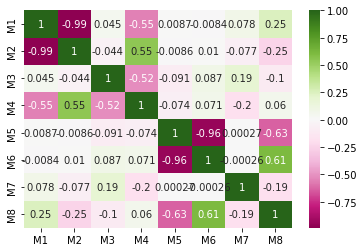

In [227]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

X = data_norm.drop('target', axis=1)
correlation = X[['M' + str(i) for i in range(1, 9)]]
sea.heatmap(correlation.corr(), annot=True, cmap="PiYG")

### 2.5 Реализация машинного обучения для SVM и LDA

In [247]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Разедляем данные на обучающую и тестовую выборки
X = data_norm.drop('target', axis=1)
y = data_norm['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [248]:
# Реализуем SVM
from sklearn.svm import SVC
SVC_model = SVC(kernel= 'linear')
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
SVC_coef = SVC_model.coef_.tolist()
SVC_coef = SVC_coef[0]

In [249]:
# Реализуем LDA
from sklearn import discriminant_analysis
LDA_model = discriminant_analysis.LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_prediction = LDA_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
LDA_coef = LDA_model.coef_.tolist()
LDA_coef = LDA_coef[0]

In [250]:
# Подсчет точности SVM и LDA
from sklearn.metrics import accuracy_score
from sklearn import model_selection
# print('Точность классификатора:')
# print('     SVM: ', accuracy_score(SVC_prediction, y_test))
# print('     LDA: ', accuracy_score(LDA_prediction, y_test))

SVM = model_selection.cross_val_score(SVC_model, X, y)
LDA = model_selection.cross_val_score(LDA_model, X, y)
print('Logloss:')
print('     SVM: ', SVM.std())
print('     LDA: ', LDA.std())



Logloss:
     SVM:  0.013446267284232708
     LDA:  0.06519580582098013


<AxesSubplot:>

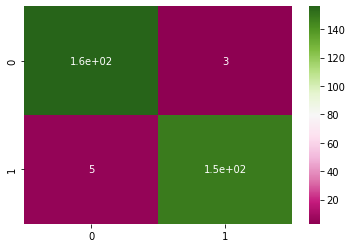

In [246]:
from sklearn.metrics import confusion_matrix
import seaborn as sea
cnf_matrix = confusion_matrix(y_test, SVC_prediction)
sea.heatmap(cnf_matrix, annot=True, cmap="PiYG")


### 2.6 Графики 

#### 2.6.1 Двумерные

In [202]:
# # Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(i + 1, len(X.columns)):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
#         plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
#         plt.plot(x, (-1) * (lam[i] * Max_M[i]) / (lam[j] * Max_M[j]) * x, label='true')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()

In [203]:
# # Вывод части графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(0, 8):
#     for j in range(i + 1, 7):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='x')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='.')
#         plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='Гиперплоскость созданная SVM')
#         plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='Гиперплоскость созданная LDA')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()

#### 2.6.2 Трехмерные

In [204]:
# # Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data.loc[:,'M1_n':'M8M7_n']
# y=data.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(len(X.columns)):
#         for k in range(len(X.columns)):
#             if i == j or j == k or i == k:
#                 continue
#             u, v = np.mgrid[-1:1:20j, -1:1:20j]
#             fig = plt.figure(figsize=(10, 10))
#             ax = fig.add_subplot(111, projection='3d')
#             ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')
#             ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')
#             ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
#             ax.set_xlabel(X.columns[i])
#             ax.set_ylabel(X.columns[j])
#             ax.set_zlabel(X.columns[k])
#             plt.legend()
#             plt.grid()
#             plt.show()

In [205]:
# # Вывод части графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1_n':'M8M7_n']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(0, 5):
#     for j in range(0, 4):
#         for k in range(0, 3):
#             if i == j or j == k or i == k:
#                 continue
#             u, v = np.mgrid[-1:1:20j, -1:1:20j]
#             fig = plt.figure(figsize=(10, 10))
#             ax = fig.add_subplot(111, projection='3d')
#             ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')
#             ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')
#             ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
#             ax.set_xlabel(X.columns[i])
#             ax.set_ylabel(X.columns[j])
#             ax.set_zlabel(X.columns[k])
#             plt.grid()
#             plt.show()

# Этап 2 | Проверка по Тейлору | Поиск оптимальной траектории | Финальная проверка

## 1. Теоретический модуль

Для проверки качества классификатора мы воспользуемся разложением по Тейлору до второго порядка функции $J$ в окрестности точки с наибольшим значением фитнеса, раскладывать будем по $s,p,q,r$. В качестве средний точки будем брать $s_0,p_0,q_0,r_0$, а подсчитанную производную в этой точке назовем $h$, тогда:

$J = h_ss + h_pp + h_qq + h_rr + h_{ss}s^2 + h_{pp}p^2 + h_{qq}q^2 + h_{rr}r^2 + h_{sp}sp + h_{sq}sq + h_{sr}sr + h_{pq}pq + h_{pr}pr + h_{qr}qr$

*Тут мы опустили из рассмотрения нулевую производную и прочие числа

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $

$ s = \gamma_{A}M_6 $

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $

$ q = \gamma_{J}M_2 $

Теперь подставив заместо $s,p,q,r$ их определения через макропараметры мы получим функцию зависимую от $M$ с какими-то коэффициентами и их мы сравним с $\lambda$ и проверим качество классификатора (Стоит сделать уточнение, что мы рассматриваем результаты только одного классификатора - SVM, так как LDA показал потерю точности при большом размере выборки и дальнейшая работа с ним дала бы слишком большие неточности) 

## 2. Проверка по Тейлору функции фитнеса J 

### 2.1 Частные производные

Найдем все производные вплоть до 2 порядка, дифференцируя $J$ по частным производным $s,p,q,r$ 

$ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

                        Производные 1-го порядка:
$$
h_s = \frac{-p-q+s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1\ \ \ \ \ \ h_p = \frac{2r + p+q-s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1
$$
$$
h_q = \frac{p+q-s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1\ \ \ \ \ \ h_r = \frac{2p}{\sqrt[2]{4rp+(p+q-s)^2}}
$$

                        Производные 2-го порядка:
$$
h_{ss} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pp} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(2r+p+q-s)(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{qq} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{rr} = \frac{-4p^2}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$

                        Смешанные производные:
$$
h_{sp} = \frac{-1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(-p-q+s)(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{sq} = \frac{-1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(-p-q+s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{sr} = \frac{-2p(-p-q+s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pq} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(2r+p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pr} = \frac{2}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{2p(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{qr} = \frac{-2p(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$


### 2.2 БЕ БЕ БЕ

In [253]:
import pandas as pd
import numpy as np
# Заново считаем J с s,p,q,r
def middle_SPQR():
   Aj = data_strat['Aj'].tolist()
   Bj = data_strat['Bj'].tolist()
   Aa = data_strat['Aa'].tolist()
   Ba = data_strat['Ba'].tolist()
   data = {}
   data_middle_SPQR = pd.DataFrame(data)
   for i in range(0, len(data_strat)):
      M1 = (sigma1*(Aj[i] + D))
      M2 = (-sigma2*(Aj[i] + D + Bj[i]/2))
      M3 = (-2*((np.pi**2)*(Bj[i]**2)))
      M4 = (-((Aj[i] + D0)**2 + (Bj[i]**2)/2))
      M5 = (sigma1*(Aa[i] + D))
      M6 = (-sigma2*(Aa[i] + D + Ba[i]/2))
      M7 = (-2*((np.pi**2)*(Ba[i]**2)))
      M8 = (-((Aa[i] + D0)**2 + (Ba[i]**2)/2))

      p = lam[0]*M1 + lam[2]*M3 + lam[3]*M4
      q = lam[1]*M2
      r = lam[4]*M5 + lam[6]*M7 + lam[7]*M8
      s = lam[5]*M6
      if ((4*r*p + (p + q - s)**2) < 0):
         row = {'J': 0, 'S': s, 'P': p, 'Q': q, 'R': r, 'A_J': Aj[i], 'B_J': Bj[i], 'A_A': Aa[i], 'B_A': Ba[i]}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
      else:
         j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
         row = {'J': j, 'S': s, 'P': p, 'Q': q, 'R': r, 'A_J': Aj[i], 'B_J': Bj[i], 'A_A': Aa[i], 'B_A': Ba[i]}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
   data_middle_SPQR.to_csv('data_middle_SPQR.csv', index=False)
   data_middle_SPQR = data_middle_SPQR.loc[data_middle_SPQR.J !=0]
   data_middle_SPQR = data_middle_SPQR.sort_values(by='J', ascending=False)
   return data_middle_SPQR[:60]

data = middle_SPQR()
data

,J,S,P,Q,R,A_J,B_J,A_A,B_A
39,0.039106,0.049965,-0.017937,0.000123,-0.006740,-115.94,0.72,-107.43,-10.03
38,0.037459,0.116297,-0.017937,0.000103,-0.006740,-115.94,-0.72,-107.43,10.03
19,0.029113,0.718252,-0.022325,0.000079,0.252395,-118.07,1.85,-19.26,15.73
18,0.026636,0.614223,-0.022325,0.000028,0.252395,-118.07,-1.85,-19.26,-15.73
13,0.005084,0.650134,-0.004559,0.000228,0.256058,-108.80,-5.93,-23.78,4.17
12,0.004596,0.622556,-0.004559,0.000393,0.256058,-108.80,5.93,-23.78,-4.17
28,0.003166,0.044971,-0.001183,0.000232,-0.024921,-106.39,-10.46,-110.63,-5.14
34,0.002180,0.600269,-0.002121,0.000269,0.215860,-107.52,-5.54,-45.43,32.39
29,0.002057,0.078964,-0.001183,0.000522,-0.024921,-106.39,10.46,-110.63,5.14
35,0.001027,0.386059,-0.002121,0.000423,0.215860,-107.52,5.54,-45.43,-32.39


In [254]:
z = 4
Aj = data_strat['Aj'].tolist()
Bj = data_strat['Bj'].tolist()
Aa = data_strat['Aa'].tolist()
Ba = data_strat['Ba'].tolist()

print(-1 + lam[1]/(2*(4*np.pi*np.pi*lam[2] + lam[3])*Bj[z]), 2*(4*np.pi*np.pi*lam[6] + lam[7])*Ba[z]/lam[5])

-0.9651768868059359 0.029561439846495677


In [208]:
Ba = -50
Bj = -1.99
print(-1 + lam[1]/(2*(4*np.pi*np.pi*lam[2] + lam[3])*Bj), 2*(4*np.pi*np.pi*lam[6] + lam[7])*Ba/lam[5])

-1.4606520479929017 -1.5740220330081702


In [209]:
z = 15

In [210]:
Ba = -46.9
Bj = -1.868
print(-1 + lam[1]/(2*(4*np.pi*np.pi*lam[2] + lam[3])*Bj), 2*(4*np.pi*np.pi*lam[6] + lam[7])*Ba/lam[5])

-1.4907374601209176 -1.4764326669616636


In [255]:
z = 5
import pandas as pd
import numpy as np
def differential():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()
   M3 = data_macro['M3'].tolist()
   M4 = data_macro['M4'].tolist()
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   p = lam[0]*M1[z] + lam[2]*M3[z] + lam[3]*M4[z]
   q = lam[1]*M2[z]
   r = lam[4]*M5[z] + lam[6]*M7[z] + lam[7]*M8[z]
   s = lam[5]*M6[z]

   # Частные производные первого порядка
   hs = (-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hp = (1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hq = (1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hr = 2.0*p/(4*p*r + (p + q - s)**2)**0.5
   # Частные производные второго порядка
   hss = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)/2
   hpp = ((-1.0*p - 1.0*q - 2.0*r + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)/2
   hqq = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)/2
   hrr = (-4.0*p**2/(4*p*r + (p + q - s)**2)**1.5)/2
   # Частные производные второго порядка | другие
   hsp = (-1.0*p - 1.0*q + 1.0*s)*(-1.0*p - 1.0*q - 2.0*r + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
   hsq = (-1.0*p - 1.0*q + 1.0*s)**2/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
   hsr = -2.0*p*(-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
   hpq = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hpr = -2.0*p*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 2.0/(4*p*r + (p + q - s)**2)**0.5
   hqr = -2.0*p*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5

   """ J = hs*s + hp*p + hq*q + hr*r + hss*s*s + hpp*p*p + hqq*q*q + hrr*r*r + hsp*s*p + hsq*s*q + hsr*s*r + hpq*p*q + hpr*p*r + hqr*q*r """
   return hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr
hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential()

lam[0] = lam[0]*hp            #M1
lam[1] = lam[1]*hq            #M2
lam[2] = lam[2]*hp            #M3
lam[3] = lam[3]*hp            #M4
lam[4] = lam[4]*hr            #M5
lam[5] = lam[5]*hs            #M6
lam[6] = lam[6]*hr            #M7
lam[7] = lam[7]*hr            #M8
lam[8] = lam[8]*hpp           #M11
lam[9] = lam[9]*hqq           #M22
lam[10] = lam[10]*hpp         #M33
lam[11] = lam[11]*hpp         #M44
lam[12] = lam[12]*hrr         #M55
lam[13] = lam[13]*hss         #M66
lam[14] = lam[14]*hrr         #M77
lam[15] = lam[15]*hrr         #M88
lam[16] = lam[16]*hpq         #M12
lam[17] = lam[17]*hpp         #M13
lam[18] = lam[18]*hpp         #M14
lam[19] = lam[19]*hpr         #M15
lam[20] = lam[20]*hsp         #M16
lam[21] = lam[21]*hpr         #M17
lam[22] = lam[22]*hpr         #M18
lam[23] = lam[23]*hpq         #M21
lam[24] = lam[24]*hpq         #M23
lam[25] = lam[25]*hpq         #M24
lam[26] = lam[26]*hqr         #M25
lam[27] = lam[27]*hsq         #M26
lam[28] = lam[28]*hqr         #M27
lam[29] = lam[29]*hqr         #M28
lam[30] = lam[30]*hpp         #M31
lam[31] = lam[31]*hpq         #M32
lam[32] = lam[32]*hpp         #M34
lam[33] = lam[33]*hpr         #M35
lam[34] = lam[34]*hsp         #M36
lam[35] = lam[35]*hpr         #M37
lam[36] = lam[36]*hpr         #M38
lam[37] = lam[37]*hpp         #M41
lam[38] = lam[38]*hpq         #M42
lam[39] = lam[39]*hpp         #M43
lam[40] = lam[40]*hpr         #M45
lam[41] = lam[41]*hsp         #M46
lam[42] = lam[42]*hpr         #M47
lam[43] = lam[43]*hpr         #M48
lam[44] = lam[44]*hpr         #M51
lam[45] = lam[45]*hqr         #M52
lam[46] = lam[46]*hpr         #M53
lam[47] = lam[47]*hpr         #M54
lam[48] = lam[48]*hsr         #M56
lam[49] = lam[49]*hrr         #M57
lam[50] = lam[50]*hrr         #M58
lam[51] = lam[51]*hsp         #M61
lam[52] = lam[52]*hsq         #M62
lam[53] = lam[53]*hsp         #M63
lam[54] = lam[54]*hsp         #M64
lam[55] = lam[55]*hsr         #M65
lam[56] = lam[56]*hsr         #M67
lam[57] = lam[57]*hsr         #M68
lam[58] = lam[58]*hpr         #M71
lam[59] = lam[59]*hqr         #M72
lam[60] = lam[60]*hpr         #M73
lam[61] = lam[61]*hpr         #M74
lam[62] = lam[62]*hrr         #M75
lam[63] = lam[63]*hsr         #M76
lam[64] = lam[64]*hrr         #M78
lam[65] = lam[65]*hpr         #M81
lam[66] = lam[66]*hqr         #M82
lam[67] = lam[67]*hpr         #M83
lam[68] = lam[68]*hpr         #M84
lam[69] = lam[69]*hrr         #M85
lam[70] = lam[70]*hsr         #M86
lam[71] = lam[71]*hrr         #M87


In [259]:
def module(u):
    ans = 0
    for elem in u:
        ans += elem * elem
    return ans

def sc(u, v):
    ans = 0;
    for i in range(len(u)):
        ans += u[i] * v[i];
    return ans;


def cos_n(u, v):
    return sc(u, v) / np.sqrt(module(u) * module(v))

SVC_coef = [SVC_coef[i]/Max_M[i] for i in range(len(SVC_coef))]
print('Косинус между векторами =', cos_n(SVC_coef, lam))
    

Косинус между векторами = -0.37737287800995967


In [213]:
""" # Вывод всех графиков
import matplotlib.pyplot as plt
X=data_norm.loc[:,'M1':'M8M7']
y=data_norm.loc[:,'target']
X1 = X[y==1]
X0 = X[y==-1]
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        x=np.linspace(-1, 1)
        plt.figure(figsize=(7, 7))
        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
        plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
        plt.plot(x, (-1) * (lam[i] * Max_M[i]) / (lam[j] * Max_M[j]) * x, label='true')
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.legend()
        plt.xlabel(X.columns[i])
        plt.ylabel(X.columns[j])
        plt.grid()
        plt.show() """

" # Вывод всех графиков\nimport matplotlib.pyplot as plt\nX=data_norm.loc[:,'M1':'M8M7']\ny=data_norm.loc[:,'target']\nX1 = X[y==1]\nX0 = X[y==-1]\nfor i in range(len(X.columns)):\n    for j in range(i + 1, len(X.columns)):\n        x=np.linspace(-1, 1)\n        plt.figure(figsize=(7, 7))\n        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')\n        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')\n        plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')\n        plt.plot(x, (-1) * (lam[i] * Max_M[i]) / (lam[j] * Max_M[j]) * x, label='true')\n        plt.xlim(-1,1)\n        plt.ylim(-1,1)\n        plt.legend()\n        plt.xlabel(X.columns[i])\n        plt.ylabel(X.columns[j])\n        plt.grid()\n        plt.show() "